In [1]:
# Import modules.

import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore", UserWarning)
import geopandas as gpd
import os

os.environ['GDAL_DATA'] = os.environ['CONDA_PREFIX'] + r'\Library\share\gdal'
os.environ['PROJ_LIB'] = os.environ['CONDA_PREFIX'] + r'\Library\share'

In [2]:
# Estabilsh file path from which to source .csv file.
file_path = "..\Data_Files\suicide-lghc-indicator-21\suicide-lghc-indicator-21.csv"

# Use Pandas to read csv.
suicide_raw = pd.read_csv(file_path)

# Convert to DataFrame.
suicide_df = pd.DataFrame(suicide_raw)

# Display DataFrame
#suicide_df

# California

In [3]:
# ISOLATE ALL ROWS CONTAINING CALIFORNIA

# Grab rows containing 'CALIFORNIA' in 'Geography'.
cont_cali = suicide_df['Geography'] == 'CALIFORNIA'
suicide_cali = suicide_df[cont_cali]

# Reset index to a usable format.
suicide_cali = suicide_cali.reset_index()
suicide_cali = suicide_cali.drop(columns=['Indicator', 'index', 'Rate', 'Age Adjusted Rate'])

# Display Data Frame
#suicide_cali

### California - Year Ranges only - Total

In [4]:
# SORT OUR TOTAL AND YEAR GROUPS, NOT SOLITARY YEARS.

# Grab rows containing 'Total' in 'Strata Name'.
cali_bytotal = suicide_cali['Strata Name'] == 'Total'
suicide_cali_total = suicide_cali[cali_bytotal]

# Reset index to a usable format.
suicide_cali_total = suicide_cali_total.reset_index()

# Drop rows containing solitary years.
suicide_cali_total = suicide_cali_total.drop(suicide_cali_total.index[0:18])

# Reset index to usable format.
suicide_cali_total = suicide_cali_total.reset_index()
suicide_cali_total = suicide_cali_total.drop(columns=['index', 'level_0'])

# Add column to normalize number of suicides against the total population in a given year range.
suicide_cali_total['% for every 100K'] = ((suicide_cali_total['Numerator'] / suicide_cali_total['Denominator']) * 100000)

# Display DataFrame
#suicide_cali_total

### Total California Suicides: 2000 - 2017

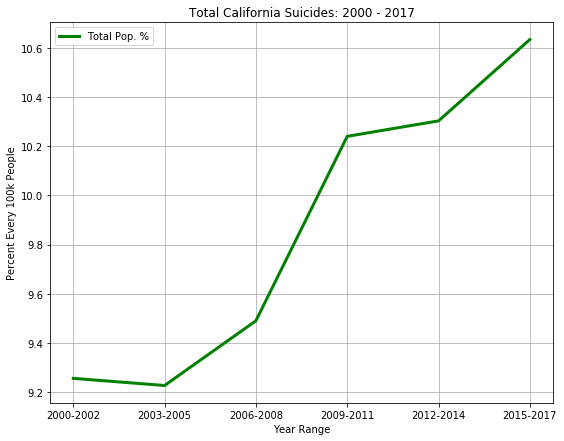

In [5]:
# PLOT THE TOTAL % OF THE POPULATION IN EACH YEAR GROUP OVER TIME.

# Establish x and y values by converting column items into a list.
x_axis = suicide_cali_total['Year'].tolist()
y_axis = suicide_cali_total['% for every 100K'].tolist()

# Establish the size of the plot. Standard for all plots in this project.
plt.figure(figsize=(9, 7))

# PLot x and y values, esbablish line formatting, plot a grid.
plt.plot(x_axis, y_axis, 'g', linewidth=3, label='Total Pop. %')
plt.grid()

# Place the legend on the plot.
plt.legend(loc="best")

# Establish titles and labeling.
plt.title('Total California Suicides: 2000 - 2017')
plt.xlabel('Year Range')
plt.ylabel('Percent Every 100k People')

# Save figure to .png file.
plt.savefig('Total California Suicides.png')

## California - Sex

In [6]:
# ISOLATE CALIFORNIA DATA BY SEX.

# Grab rows containing 'Sex' in the 'Strata' column.
cali_bysex = suicide_cali['Strata'] == 'Sex'
suicide_cali_sex = suicide_cali[cali_bysex]

# Reset index to a usable format.
suicide_cali_sex = suicide_cali_sex.reset_index()
suicide_cali_sex = suicide_cali_sex.drop(columns=['index'])

# Display DataFrame.
#suicide_cali_sex

### California - Sex - Female

In [7]:
# SORT OUT FEMALE AND YEAR GROUPS, NOT SOLITARY YEARS.

# Grab rows containting 'Female' in the 'Strata Name' column.
cali_byfemale = suicide_cali_sex['Strata Name'] == 'Female'
suicide_cali_female = suicide_cali_sex[cali_byfemale]

# Reset the index to a usable format.
suicide_cali_female = suicide_cali_female.reset_index()
suicide_cali_female = suicide_cali_female.drop(columns=['index'])

# Drop rows containing solitary years.
suicide_cali_female = suicide_cali_female.drop(suicide_cali_female.index[0:18])

# Reset index to a usable format.
suicide_cali_female = suicide_cali_female.reset_index()
suicide_cali_female = suicide_cali_female.drop(columns=['index'])

# Add column to normalize number of suicides against the female population in a given year range. 
suicide_cali_female['% for every 100K'] = ((suicide_cali_female['Numerator'] / suicide_cali_female['Denominator']) * 100000)

# Display DataFrame.
#suicide_cali_female

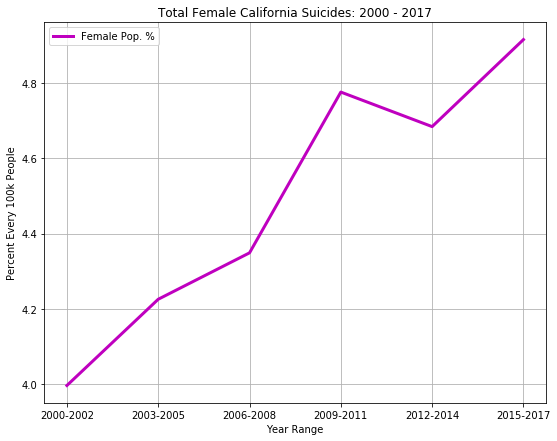

In [8]:
# PLOT THE FEMALE % OF THE FEMALE POPULATION IN EACH YEAR GROUP OVER TIME.

# Establish x and y values by converting column items into a list.
x_female = suicide_cali_female['Year'].tolist()
y_female = suicide_cali_female['% for every 100K'].tolist()

# Establish the size of the plot. Standard for all plots in this project.
plt.figure(figsize=(9, 7))

# PLot x and y values, esbablish line formatting, plot a grid.
plt.plot(x_female, y_female, 'm', linewidth=3, label='Female Pop. %')
plt.grid()

# Place the legend on the plot.
plt.legend(loc="best")

# Establish titles and labeling.
plt.title('Total Female California Suicides: 2000 - 2017')
plt.xlabel('Year Range')
plt.ylabel('Percent Every 100k People')

# Save figure to .png file.
plt.savefig('Total Female California Suicides.png')

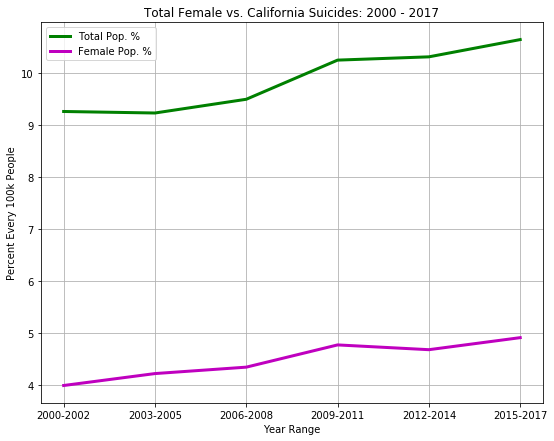

In [9]:
# PLOT THE TOTAL AND FEMALE % OF THE TOTAL AND FEMALE POPULATION IN EACH YEAR GROUP OVER TIME.

# Establish x and y values by converting column items into a list.
plt.figure(figsize=(9, 7))

# PLot x and y values for female and California data sets, esbablish line formatting, plot a grid.
plt.plot(x_axis, y_axis, 'g', linewidth=3, label='Total Pop. %')
plt.plot(x_female, y_female, 'm', linewidth=3, label='Female Pop. %')
plt.grid()

# Place the legend on the plot.
plt.legend(loc="best")

# Establish titles and labeling.
plt.title('Total Female vs. California Suicides: 2000 - 2017')
plt.xlabel('Year Range')
plt.ylabel('Percent Every 100k People')

# Save figure to .png file.
plt.savefig('Total Female vs. California Suicides.png')

### California - Sex - Male

In [10]:
# SORT OUT MALE AND YEAR GROUPS, NOT SOLITARY YEARS.

# Grab rows containting 'Male' in the 'Strata Name' column.
cali_bymale = suicide_cali_sex['Strata Name'] == 'Male'
suicide_cali_male = suicide_cali_sex[cali_bymale]

# Reset the index to a usable format.
suicide_cali_male = suicide_cali_male.reset_index()
suicide_cali_male = suicide_cali_male.drop(columns=['index'])

# Drop rows containing solitary years.
suicide_cali_male = suicide_cali_male.drop(suicide_cali_male.index[0:18])

# Reset the index to a usable format.
suicide_cali_male = suicide_cali_male.reset_index()
suicide_cali_male = suicide_cali_male.drop(columns=['index'])

# Add column to normalize number of suicides against the female population in a given year range. 
suicide_cali_male['% for every 100K'] = ((suicide_cali_male['Numerator'] / suicide_cali_male['Denominator']) * 100000)

# Display DataFrame.
#suicide_cali_male

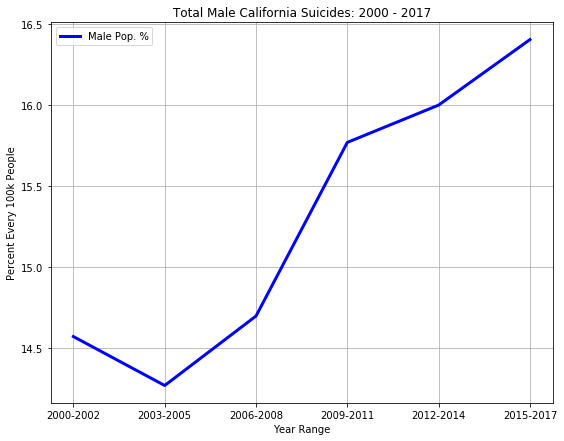

In [11]:
# PLOT THE MALE % OF THE MALE POPULATION IN EACH YEAR GROUP OVER TIME.

# Establish x and y values by converting column items into a list.
x_male = suicide_cali_male['Year'].tolist()
y_male = suicide_cali_male['% for every 100K'].tolist()

# Establish the size of the plot. Standard for all plots in this project.
plt.figure(figsize=(9, 7))

# PLot x and y values, esbablish line formatting, plot a grid.
plt.plot(x_male, y_male, 'b', linewidth=3, label='Male Pop. %')
plt.grid()

# Place the legend on the plot.
plt.legend(loc="best")

# Establish titles and labeling.
plt.title('Total Male California Suicides: 2000 - 2017')
plt.xlabel('Year Range')
plt.ylabel('Percent Every 100k People')

# Save figure to .png file.
plt.savefig('Total Male California Suicides.png')

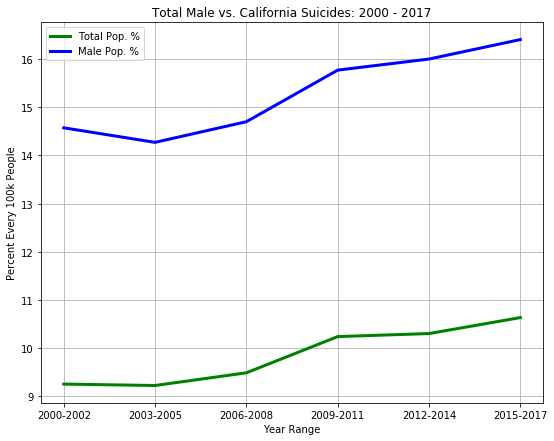

In [12]:
# PLOT THE TOTAL AND MALE % OF THE TOTAL AND MALE POPULATION IN EACH YEAR GROUP OVER TIME.

# Establish x and y values by converting column items into a list.
plt.figure(figsize=(9, 7))

# PLot x and y values for male and California data sets, esbablish line formatting, plot a grid.
plt.plot(x_axis, y_axis, 'g', linewidth=3, label='Total Pop. %')
plt.plot(x_male, y_male, 'b', linewidth=3, label='Male Pop. %')
plt.grid()

# Place the legend on the plot.
plt.legend(loc="best")

# Establish titles and labeling.
plt.title('Total Male vs. California Suicides: 2000 - 2017')
plt.xlabel('Year Range')
plt.ylabel('Percent Every 100k People')

# Save figure to .png file.
plt.savefig('Total Male vs. California Suicides.png')

## California - Sex - Overall Analysis

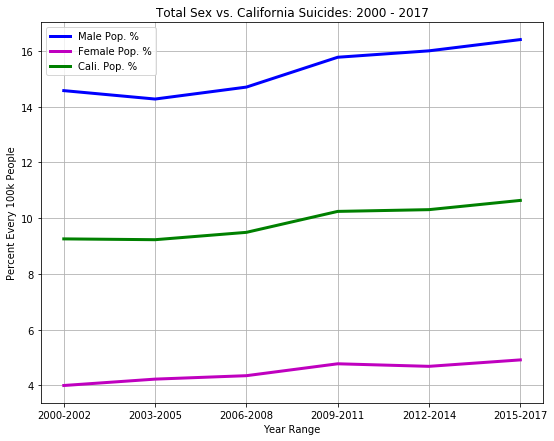

In [13]:
# PLOT THE TOTAL, FEMALE, AND MALE % OF THE TOTAL, FEMALE, AND MALE POPULATION IN EACH YEAR GROUP OVER TIME.

# Establish x and y values by converting column items into a list.
plt.figure(figsize=(9, 7))

# PLot x and y values for male, female, and California data sets, esbablish line formatting, plot a grid.
males = plt.plot(x_male, y_male, 'b', linewidth=3, label='Male Pop. %')
females = plt.plot(x_female, y_female, 'm', linewidth=3, label='Female Pop. %')
total = plt.plot(x_axis, y_axis, 'g', linewidth=3, label='Cali. Pop. %')
plt.grid()

# Place the legend on the plot.
plt.legend(loc="best")

# Establish titles and labeling.
plt.title('Total Sex vs. California Suicides: 2000 - 2017')
plt.xlabel('Year Range')
plt.ylabel('Percent Every 100k People')

# Save figure to .png file.
plt.savefig('Total Sex vs. California Suicides.png')

## California - Race

In [14]:
# ISOLATE CALIFORNIA DATA BY RACE.

# Grab rows containing 'Race' in the 'Strata' column.
cali_byrace = suicide_cali['Strata'] == 'Race/Ethnicity'
suicide_cali_race = suicide_cali[cali_byrace]

# Reset index to a usable format.
suicide_cali_race = suicide_cali_race.reset_index()
suicide_cali_race = suicide_cali_race.drop(columns=['index'])

# Display DataFrame.
#suicide_cali_race

In [15]:
# CREATES ALL TABLES FOR THE VARIOUS RACES AND THEIR CONTAINING YEARS, CALIFORNIA WIDE.

# Establish the function I want to run on each race group
def create_race_table(current_race):
    
    global suicide_cali_races
    
    # Grab rows containting i, the current selecte race in the 'Strata Name' column.
    cali_byraces = suicide_cali_race['Strata Name'] == i
    suicide_cali_races = suicide_cali_race[cali_byraces]
    
    # Reset the index to a usable format.
    suicide_cali_races = suicide_cali_races.reset_index()
    suicide_cali_races = suicide_cali_races.drop(columns=['index'])
    
    # Add column to normalize number of suicides against the current race selection population in a given year range.
    suicide_cali_races['% for every 100K'] = ((suicide_cali_races['Numerator'] / suicide_cali_races['Denominator']) * 100)
    
    # Returns variable for use outside of the function.
    return suicide_cali_races;


# Creates an array of of the unique races under the column 'Strata Name'.
census_array = suicide_cali_race['Strata Name'].unique()

# Converts array to list.
census_list = census_array.tolist()

# For loop to iterrate through the available races and call the function. 
for i in census_list:
    
    if i in census_list[0]:
        create_race_table(i)
        suicide_cali_race1 = suicide_cali_races
        
    elif i in census_list[1]:
        create_race_table(i)
        suicide_cali_race2 = suicide_cali_races
        
    elif i in census_list[2]:
        create_race_table(i)
        suicide_cali_race3 = suicide_cali_races
        
    elif i in census_list[3]:
        create_race_table(i)
        suicide_cali_race4 = suicide_cali_races
        
    elif i in census_list[4]:
        create_race_table(i)
        suicide_cali_race5 = suicide_cali_races
        
    elif i in census_list[5]:
        create_race_table(i)
        suicide_cali_race6 = suicide_cali_races
        
    elif i in census_list[6]:
        create_race_table(i)
        suicide_cali_race7 = suicide_cali_races
        


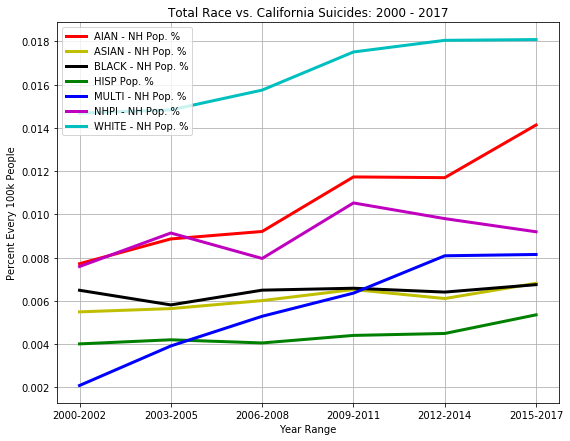

In [16]:
# PLOT THE TOTAL, FEMALE, AND MALE % OF THE TOTAL, FEMALE, AND MALE POPULATION IN EACH YEAR GROUP OVER TIME.

# Establish all y value sets
y_race1 = suicide_cali_race1['% for every 100K'].tolist()
y_race2 = suicide_cali_race2['% for every 100K'].tolist()
y_race3 = suicide_cali_race3['% for every 100K'].tolist()
y_race4 = suicide_cali_race4['% for every 100K'].tolist()
y_race5 = suicide_cali_race5['% for every 100K'].tolist()
y_race6 = suicide_cali_race6['% for every 100K'].tolist()
y_race7 = suicide_cali_race7['% for every 100K'].tolist()

# Establish x and y values by converting column items into a list.
plt.figure(figsize=(9, 7))

# PLot x and y values for all race data sets, esbablish line formatting, plot a grid.
race1 = plt.plot(x_axis, y_race1, 'r', linewidth=3, label='AIAN - NH Pop. %')
race2 = plt.plot(x_axis, y_race2, 'y', linewidth=3, label='ASIAN - NH Pop. %')
race3 = plt.plot(x_axis, y_race3, 'k', linewidth=3, label='BLACK - NH Pop. %')
race4 = plt.plot(x_axis, y_race4, 'g', linewidth=3, label='HISP Pop. %')
race5 = plt.plot(x_axis, y_race5, 'b', linewidth=3, label='MULTI - NH Pop. %')
race6 = plt.plot(x_axis, y_race6, 'm', linewidth=3, label='NHPI - NH Pop. %')
race7 = plt.plot(x_axis, y_race7, 'c', linewidth=3, label='WHITE - NH Pop. %')
plt.grid()

# Place the legend on the plot.
plt.legend(loc="best")

# Establish titles and labeling.
plt.title('Total Race vs. California Suicides: 2000 - 2017')
plt.xlabel('Year Range')
plt.ylabel('Percent Every 100k People')

# Save figure to .png file.
plt.savefig('Total Race vs. California Suicides.png')

In [17]:
#cali_race_group = suicide_cali_race.groupby(['Year', 'Strata Name'])
#cali_race_group.sum()

# All Counties

In [19]:
# ISOLATE ALL ROWS NOT CONTAINING CALIFORNIA.

# Grab all rows not containing 'CALIFORNIA' in 'Geography'.
all_counties = suicide_df['Geography'] != 'CALIFORNIA'
suicide_counties = suicide_df[all_counties]

# Reset Index to usable format. Drop superfluous columns.
suicide_counties = suicide_counties.reset_index()
suicide_counties = suicide_counties.drop(columns=['Indicator', 'index', 'Rate', 'Age Adjusted Rate'])

# Display DataFrame.
#suicide_counties

## Counties - Sex

In [20]:
county_bysex = suicide_counties['Strata'] == 'Sex'
suicide_county_sex = suicide_counties[county_bysex]
suicide_county_sex = suicide_county_sex.reset_index()
suicide_county_sex = suicide_county_sex.drop(columns=['index'])

suicide_county_sex

,Geography,Year,Strata,Strata Name,Numerator,Denominator
0,San Francisco,2000-2002,Sex,Female,67,1153000
1,El Dorado,2000-2002,Sex,Female,13,242700
2,Fresno,2000-2002,Sex,Female,36,1222000
3,Kern,2000-2002,Sex,Female,32,991600
4,Riverside,2000-2002,Sex,Female,111,2444000
...,...,...,...,...,...,...
707,Butte,2015-2017,Sex,Total,128,676000
708,Santa Cruz,2015-2017,Sex,Total,136,829300
709,Sonoma,2015-2017,Sex,Total,205,1512000
710,Trinity,2015-2017,Sex,Total,16,40490


### Counties - Sex - "2000-2002"

In [21]:
count_sex_by00_02 = suicide_county_sex['Year'] == '2000-2002'
count_sex_00_02 = suicide_county_sex[count_sex_by00_02]
count_sex_00_02 = count_sex_00_02.reset_index()
count_sex_00_02 = count_sex_00_02.drop(columns=['index'])
#count_sex_00_02

In [22]:
count_total_by00_02 = count_sex_00_02['Strata Name'] == 'Total'
count_total_00_02 = count_sex_00_02[count_total_by00_02]
count_total_00_02 = count_total_00_02.reset_index()
count_total_00_02 = count_total_00_02.drop(columns=['index'])
count_total_00_02['% for every 100K'] = ((count_total_00_02['Numerator'] / count_total_00_02['Denominator']) * 100000)
#count_total_00_02

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


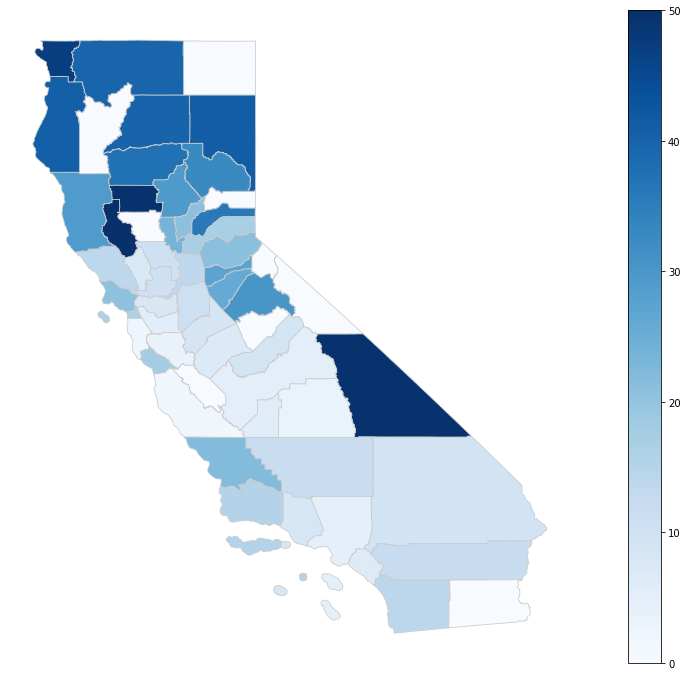

In [24]:
fp = 'CA_Counties_TIGER2016.shp'

map_df = gpd.read_file(fp)
map_df.head()

merged = map_df.set_index('NAME').join(count_total_00_02.set_index('Geography'))

merged.head()

variable = '% for every 100K'

#vmin, vmax = (count_total_00_02['% for every 100K'].max()), (count_total_00_02['% for every 100K'].min())

vmin, vmax = 0, 50

fig, ax = plt.subplots(1, figsize=(20, 12))
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')

sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

### Counties - Sex - "2003-2005"

In [25]:
count_sex_by03_05 = suicide_county_sex['Year'] == '2003-2005'
count_sex_03_05 = suicide_county_sex[count_sex_by03_05]
count_sex_03_05 = count_sex_03_05.reset_index()
count_sex_03_05 = count_sex_03_05.drop(columns=['index'])
#count_sex_03_05

In [26]:
count_total_by03_05 = count_sex_03_05['Strata Name'] == 'Total'
count_total_03_05 = count_sex_03_05[count_total_by03_05]
count_total_03_05 = count_total_03_05.reset_index()
count_total_03_05 = count_total_03_05.drop(columns=['index'])
count_total_03_05['% for every 100K'] = ((count_total_03_05['Numerator'] / count_total_03_05['Denominator']) * 100000)
#count_total_03_05

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


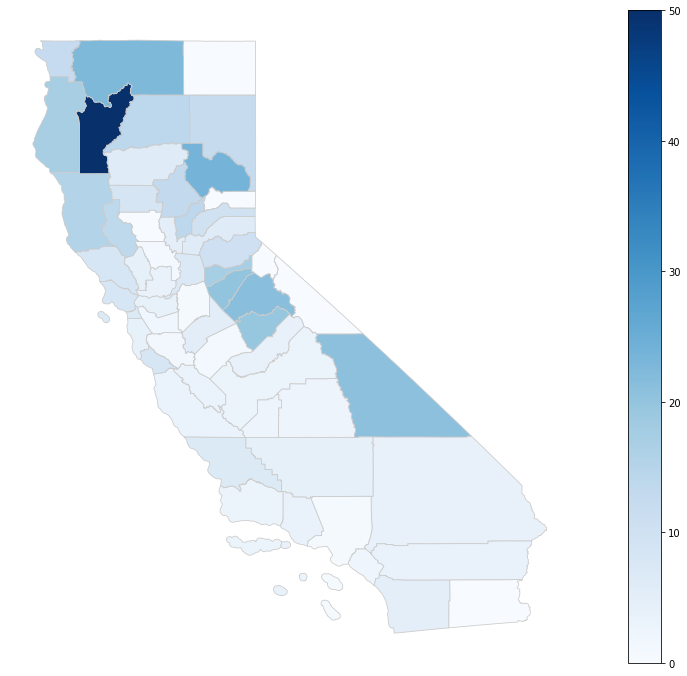

In [27]:
map_df = gpd.read_file(fp)
map_df.head()

merged = map_df.set_index('NAME').join(count_total_03_05.set_index('Geography'))

merged.head()

variable = '% for every 100K'

#vmin, vmax = (count_total_03_05['% for every 100K'].max()), (count_total_03_05['% for every 100K'].min())

vmin, vmax = 0, 50

fig, ax = plt.subplots(1, figsize=(20, 12))
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')

sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

### Counties - Sex - "2006-2008"

In [28]:
count_sex_by06_08 = suicide_county_sex['Year'] == '2006-2008'
count_sex_06_08 = suicide_county_sex[count_sex_by06_08]
count_sex_06_08 = count_sex_06_08.reset_index()
count_sex_06_08 = count_sex_06_08.drop(columns=['index'])

#count_sex_06_08

In [29]:
count_total_by06_08 = count_sex_06_08['Strata Name'] == 'Total'
count_total_06_08 = count_sex_06_08[count_total_by06_08]
count_total_06_08 = count_total_06_08.reset_index()
count_total_06_08 = count_total_06_08.drop(columns=['index'])
count_total_06_08['% for every 100K'] = ((count_total_06_08['Numerator'] / count_total_06_08['Denominator']) * 100000)
#count_total_06_08

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


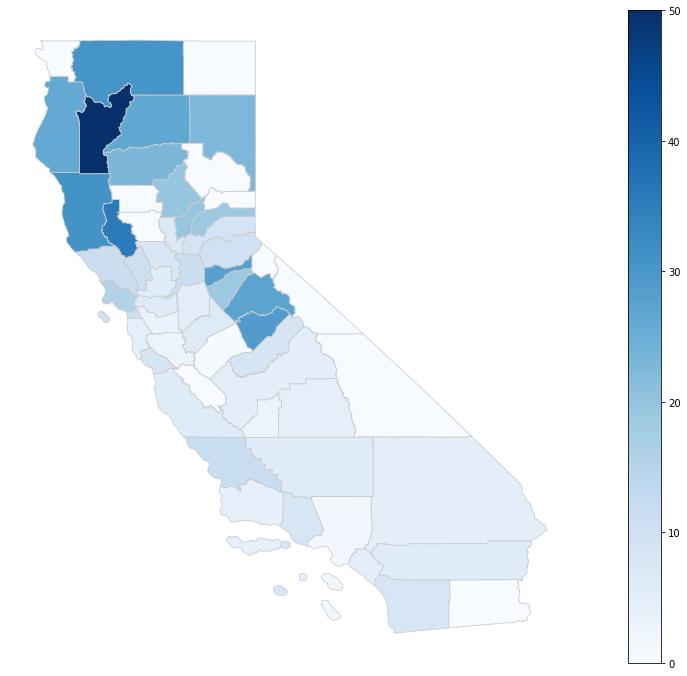

In [30]:
map_df = gpd.read_file(fp)
map_df.head()

merged = map_df.set_index('NAME').join(count_total_06_08.set_index('Geography'))

merged.head()

variable = '% for every 100K'

#vmin, vmax = (count_total_06_08['% for every 100K'].max()), (count_total_06_08['% for every 100K'].min())

vmin, vmax = 0, 50

fig, ax = plt.subplots(1, figsize=(20, 12))
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')

sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

### Counties - Sex - "2009-2011"

In [31]:
count_sex_by09_11 = suicide_county_sex['Year'] == '2009-2011'
count_sex_09_11 = suicide_county_sex[count_sex_by09_11]
count_sex_09_11 = count_sex_09_11.reset_index()
count_sex_09_11 = count_sex_09_11.drop(columns=['index'])

count_sex_09_11

,Geography,Year,Strata,Strata Name,Numerator,Denominator
0,Orange,2009-2011,Sex,Female,207,4576000
1,Madera,2009-2011,Sex,Female,16,234000
2,Solano,2009-2011,Sex,Female,37,620600
3,Fresno,2009-2011,Sex,Female,58,1400000
4,Lake,2009-2011,Sex,Female,13,96680
...,...,...,...,...,...,...
120,Tehama,2009-2011,Sex,Total,33,190200
121,Solano,2009-2011,Sex,Total,161,1240000
122,San Bernardino,2009-2011,Sex,Total,637,6131000
123,Santa Clara,2009-2011,Sex,Total,451,5379000


In [32]:
count_total_by09_11 = count_sex_09_11['Strata Name'] == 'Total'
count_total_09_11 = count_sex_09_11[count_total_by09_11]
count_total_09_11 = count_total_09_11.reset_index()
count_total_09_11 = count_total_09_11.drop(columns=['index'])
count_total_09_11['% for every 100K'] = ((count_total_09_11['Numerator'] / count_total_09_11['Denominator']) * 100000)
count_total_09_11

,Geography,Year,Strata,Strata Name,Numerator,Denominator,% for every 100K
0,Los Angeles,2009-2011,Sex,Total,2300,29540000,7.786053
1,El Dorado,2009-2011,Sex,Total,113,541500,20.867959
2,Orange,2009-2011,Sex,Total,829,9063000,9.147082
3,Fresno,2009-2011,Sex,Total,218,2799000,7.788496
4,Marin,2009-2011,Sex,Total,117,757800,15.439430
5,Inyo,2009-2011,Sex,Total,13,55530,23.410769
6,Kings,2009-2011,Sex,Total,31,455300,6.808698
7,Sonoma,2009-2011,Sex,Total,208,1451000,14.334941
8,Sacramento,2009-2011,Sex,Total,524,4267000,12.280291
9,Alameda,2009-2011,Sex,Total,418,4551000,9.184795


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


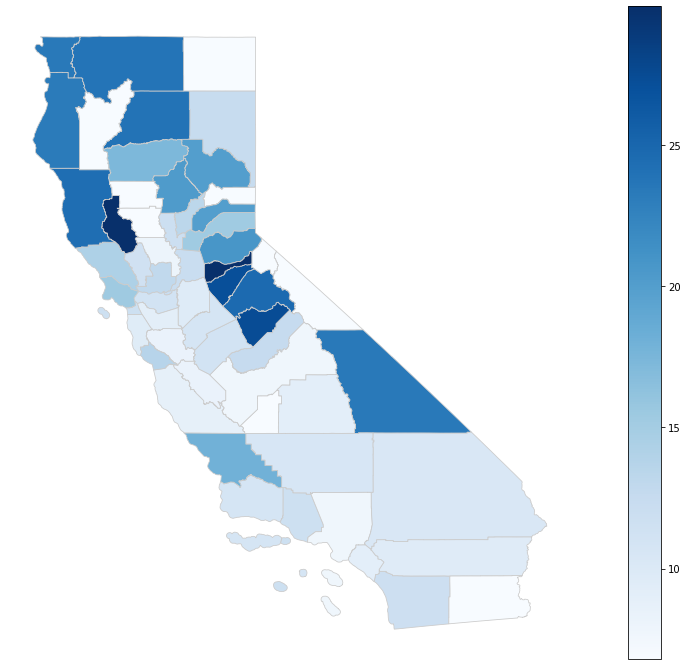

In [33]:
map_df = gpd.read_file(fp)
map_df.head()

merged = map_df.set_index('NAME').join(count_total_09_11.set_index('Geography'))

merged.head()

variable = '% for every 100K'

vmin, vmax = (count_total_09_11['% for every 100K'].max()), (count_total_09_11['% for every 100K'].min())

fig, ax = plt.subplots(1, figsize=(20, 12))
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')

sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

### Counties - Sex - "2012-2014"

In [34]:
count_sex_by12_14 = suicide_county_sex['Year'] == '2012-2014'
count_sex_12_14 = suicide_county_sex[count_sex_by12_14]
count_sex_12_14 = count_sex_12_14.reset_index()
count_sex_12_14 = count_sex_12_14.drop(columns=['index'])

count_sex_12_14

,Geography,Year,Strata,Strata Name,Numerator,Denominator
0,San Bernardino,2012-2014,Sex,Female,103,3159000
1,Merced,2012-2014,Sex,Female,18,394300
2,Mendocino,2012-2014,Sex,Female,13,132000
3,Nevada,2012-2014,Sex,Female,14,148700
4,Humboldt,2012-2014,Sex,Female,28,201500
...,...,...,...,...,...,...
114,Contra Costa,2012-2014,Sex,Total,318,3268000
115,Los Angeles,2012-2014,Sex,Total,2327,30170000
116,Solano,2012-2014,Sex,Total,149,1264000
117,Santa Cruz,2012-2014,Sex,Total,120,809800


### Counties - Sex - "2015-2017"

In [35]:
count_sex_by15_17 = suicide_county_sex['Year'] == '2015-2017'
count_sex_15_17 = suicide_county_sex[count_sex_by15_17]
count_sex_15_17 = count_sex_15_17.reset_index()
count_sex_15_17 = count_sex_15_17.drop(columns=['index'])

count_sex_15_17

,Geography,Year,Strata,Strata Name,Numerator,Denominator
0,Contra Costa,2015-2017,Sex,Female,87,1733000
1,San Bernardino,2015-2017,Sex,Female,150,3243000
2,Shasta,2015-2017,Sex,Female,31,272400
3,Humboldt,2015-2017,Sex,Female,26,203300
4,Merced,2015-2017,Sex,Female,22,405600
...,...,...,...,...,...,...
117,Butte,2015-2017,Sex,Total,128,676000
118,Santa Cruz,2015-2017,Sex,Total,136,829300
119,Sonoma,2015-2017,Sex,Total,205,1512000
120,Trinity,2015-2017,Sex,Total,16,40490


In [36]:
count_total_by15_17 = count_sex_15_17['Strata Name'] == 'Total'
count_total_15_17 = count_sex_15_17[count_total_by15_17]
count_total_15_17 = count_total_15_17.reset_index()
count_total_15_17 = count_total_15_17.drop(columns=['index'])
count_total_15_17['% for every 100K'] = ((count_total_15_17['Numerator'] / count_total_15_17['Denominator']) * 100000)
#count_total_15_17

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


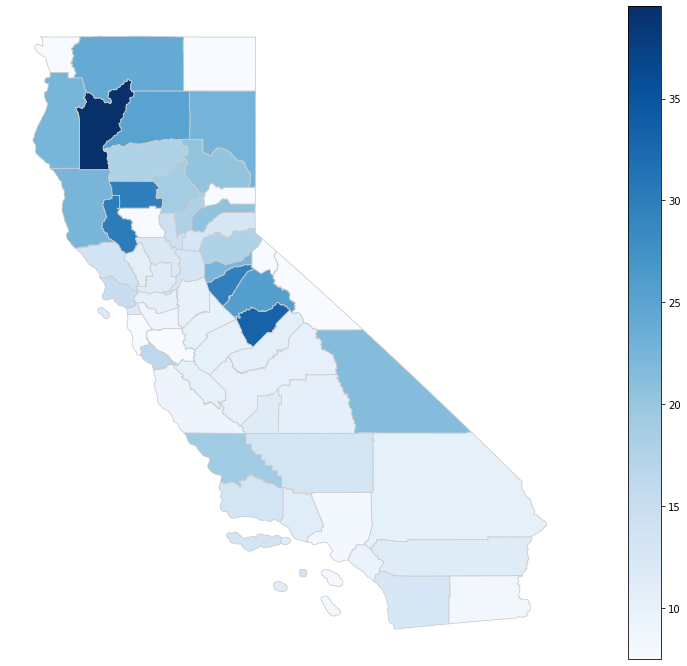

In [37]:
fp = 'CA_Counties_TIGER2016.shp'

map_df = gpd.read_file(fp)
map_df.head()

merged = map_df.set_index('NAME').join(count_total_15_17.set_index('Geography'))

merged.head()

variable = '% for every 100K'

vmin, vmax = (count_total_15_17['% for every 100K'].max()), (count_total_15_17['% for every 100K'].min())

fig, ax = plt.subplots(1, figsize=(20, 12))
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')

sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

## Counties - Race

In [38]:
county_byrace = suicide_counties['Strata'] == 'Race/Ethnicity'
suicide_county_race = suicide_counties[county_byrace]
suicide_county_race = suicide_county_race.reset_index()
suicide_county_race = suicide_county_race.drop(columns=['index'])

suicide_county_race

,Geography,Year,Strata,Strata Name,Numerator,Denominator
0,Alameda,2000-2002,Race/Ethnicity,Asian-NH,47,970100
1,Alameda,2000-2002,Race/Ethnicity,Black-NH,34,622600
2,Alameda,2000-2002,Race/Ethnicity,Hisp,31,858900
3,Alameda,2000-2002,Race/Ethnicity,White-NH,234,1757000
4,Alameda,2003-2005,Race/Ethnicity,Asian-NH,46,1028000
...,...,...,...,...,...,...
573,Yolo,2015-2017,Race/Ethnicity,White-NH,54,309100
574,Yuba,2006-2008,Race/Ethnicity,White-NH,35,128900
575,Yuba,2009-2011,Race/Ethnicity,White-NH,24,128200
576,Yuba,2012-2014,Race/Ethnicity,White-NH,27,129900


In [39]:
county_race_groupby = suicide_county_race.groupby(['Year', 'Geography', 'Strata Name'])
county_race_groupby.sum()

Numerator  Denominator
Year      Geography Strata Name                        
2000-2002 Alameda   Asian-NH            47       970100
                    Black-NH            34       622600
                    Hisp                31       858900
                    White-NH           234      1757000
          Amador    White-NH            17        88520
...                                    ...          ...
2015-2017 Ventura   Hisp                39      1091000
                    White-NH           230      1191000
          Yolo      Hisp                16       203500
                    White-NH            54       309100
          Yuba      White-NH            33       131500

[578 rows x 2 columns]

### Counties - Race - "2000-2002"

In [40]:
count_race_by00_02 = suicide_county_race['Year'] == '2000-2002'
count_race_00_02 = suicide_county_race[count_race_by00_02]
count_race_00_02 = count_race_00_02.reset_index()
count_race_00_02 = count_race_00_02.drop(columns=['index'])

count_race_00_02

,Geography,Year,Strata,Strata Name,Numerator,Denominator
0,Alameda,2000-2002,Race/Ethnicity,Asian-NH,47,970100
1,Alameda,2000-2002,Race/Ethnicity,Black-NH,34,622600
2,Alameda,2000-2002,Race/Ethnicity,Hisp,31,858900
3,Alameda,2000-2002,Race/Ethnicity,White-NH,234,1757000
4,Amador,2000-2002,Race/Ethnicity,White-NH,17,88520
...,...,...,...,...,...,...
83,Tulare,2000-2002,Race/Ethnicity,White-NH,56,456700
84,Tuolumne,2000-2002,Race/Ethnicity,White-NH,28,140600
85,Ventura,2000-2002,Race/Ethnicity,Hisp,35,799400
86,Ventura,2000-2002,Race/Ethnicity,White-NH,161,1281000


In [41]:
county_race_00_02_group = count_race_00_02.groupby(['Geography'])
totals_list = county_race_00_02_group['Numerator'].sum()
totals_list_df = pd.DataFrame(totals_list)
test = totals_list_df.max()
race_max = test[0]


for index, row in totals_list_df.iterrows():
       if row["Numerator"] == race_max:
            print (index, row[0])

Los Angeles 2185


In [42]:
test = totals_list_df.min()
race_min = test[0]

for index, row in totals_list_df.iterrows():
       if row["Numerator"] == race_min:
            print (index, row[0])

Plumas 11


### Counties - Race - "2003-2005"

In [43]:
count_race_by03_05 = suicide_county_race['Year'] == '2003-2005'
count_race_03_05 = suicide_county_race[count_race_by03_05]
count_race_03_05 = count_race_03_05.reset_index()
count_race_03_05 = count_race_03_05.drop(columns=['index'])

count_race_03_05

,Geography,Year,Strata,Strata Name,Numerator,Denominator
0,Alameda,2003-2005,Race/Ethnicity,Asian-NH,46,1028000
1,Alameda,2003-2005,Race/Ethnicity,Black-NH,36,596200
2,Alameda,2003-2005,Race/Ethnicity,Hisp,44,903100
3,Alameda,2003-2005,Race/Ethnicity,White-NH,213,1677000
4,Butte,2003-2005,Race/Ethnicity,White-NH,104,500500
...,...,...,...,...,...,...
83,Tulare,2003-2005,Race/Ethnicity,White-NH,58,455700
84,Tuolumne,2003-2005,Race/Ethnicity,White-NH,38,142200
85,Ventura,2003-2005,Race/Ethnicity,Hisp,37,865900
86,Ventura,2003-2005,Race/Ethnicity,White-NH,171,1276000


### Counties - Race - "2006-2008"

In [44]:
count_race_by06_08 = suicide_county_race['Year'] == '2006-2008'
count_race_06_08 = suicide_county_race[count_race_by06_08]
count_race_06_08 = count_race_06_08.reset_index()
count_race_06_08 = count_race_06_08.drop(columns=['index'])

count_race_06_08

,Geography,Year,Strata,Strata Name,Numerator,Denominator
0,Alameda,2006-2008,Race/Ethnicity,Asian-NH,53,1093000
1,Alameda,2006-2008,Race/Ethnicity,Black-NH,30,576200
2,Alameda,2006-2008,Race/Ethnicity,Hisp,34,950000
3,Alameda,2006-2008,Race/Ethnicity,Multi-NH,14,154100
4,Alameda,2006-2008,Race/Ethnicity,White-NH,217,1613000
...,...,...,...,...,...,...
86,Tulare,2006-2008,Race/Ethnicity,White-NH,76,452200
87,Ventura,2006-2008,Race/Ethnicity,Hisp,42,922000
88,Ventura,2006-2008,Race/Ethnicity,White-NH,205,1246000
89,Yolo,2006-2008,Race/Ethnicity,White-NH,45,303900


### Counties - Race - "2009-2011"

In [45]:
count_race_by09_11 = suicide_county_race['Year'] == '2009-2011'
count_race_09_11 = suicide_county_race[count_race_by09_11]
count_race_09_11 = count_race_09_11.reset_index()
count_race_09_11 = count_race_09_11.drop(columns=['index'])

count_race_09_11

,Geography,Year,Strata,Strata Name,Numerator,Denominator
0,Alameda,2009-2011,Race/Ethnicity,Asian-NH,59,1180000
1,Alameda,2009-2011,Race/Ethnicity,Black-NH,40,561000
2,Alameda,2009-2011,Race/Ethnicity,Hisp,57,1024000
3,Alameda,2009-2011,Race/Ethnicity,White-NH,242,1564000
4,Amador,2009-2011,Race/Ethnicity,White-NH,30,90840
...,...,...,...,...,...,...
92,Tuolumne,2009-2011,Race/Ethnicity,White-NH,37,136300
93,Ventura,2009-2011,Race/Ethnicity,Hisp,37,995700
94,Ventura,2009-2011,Race/Ethnicity,White-NH,230,1211000
95,Yolo,2009-2011,Race/Ethnicity,White-NH,34,303900


### Counties - Race - "2012-2014"

In [46]:
count_race_by12_14 = suicide_county_race['Year'] == '2012-2014'
count_race_12_14 = suicide_county_race[count_race_by12_14]
count_race_12_14 = count_race_12_14.reset_index()
count_race_12_14 = count_race_12_14.drop(columns=['index'])

count_race_12_14

,Geography,Year,Strata,Strata Name,Numerator,Denominator
0,Alameda,2012-2014,Race/Ethnicity,Asian-NH,84,1259000
1,Alameda,2012-2014,Race/Ethnicity,Black-NH,35,564700
2,Alameda,2012-2014,Race/Ethnicity,Hisp,43,1087000
3,Alameda,2012-2014,Race/Ethnicity,White-NH,260,1579000
4,Amador,2012-2014,Race/Ethnicity,White-NH,33,88660
...,...,...,...,...,...,...
98,Ventura,2012-2014,Race/Ethnicity,Asian-NH,15,166600
99,Ventura,2012-2014,Race/Ethnicity,Hisp,49,1048000
100,Ventura,2012-2014,Race/Ethnicity,White-NH,220,1203000
101,Yolo,2012-2014,Race/Ethnicity,White-NH,39,306000


### Counties - Race - "2015-2017"

In [47]:
count_race_by15_17 = suicide_county_race['Year'] == '2015-2017'
count_race_15_17 = suicide_county_race[count_race_by15_17]
count_race_15_17 = count_race_15_17.reset_index()
count_race_15_17 = count_race_15_17.drop(columns=['index'])

count_race_15_17

,Geography,Year,Strata,Strata Name,Numerator,Denominator
0,Alameda,2015-2017,Race/Ethnicity,Asian-NH,82,1338000
1,Alameda,2015-2017,Race/Ethnicity,Black-NH,41,567200
2,Alameda,2015-2017,Race/Ethnicity,Hisp,60,1145000
3,Alameda,2015-2017,Race/Ethnicity,White-NH,247,1589000
4,Butte,2015-2017,Race/Ethnicity,White-NH,112,500000
...,...,...,...,...,...,...
106,Ventura,2015-2017,Race/Ethnicity,Hisp,39,1091000
107,Ventura,2015-2017,Race/Ethnicity,White-NH,230,1191000
108,Yolo,2015-2017,Race/Ethnicity,Hisp,16,203500
109,Yolo,2015-2017,Race/Ethnicity,White-NH,54,309100
